# Capstone Project 1: In-Depth Analysis

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from PIL import Image 
import matplotlib.image as mpimg
from scipy.stats import norm
from ipywidgets import interact
import ipywidgets as widgets
from sklearn.model_selection import train_test_split

In [141]:
# Load data
taxi_file = pd.read_csv('/Users/mehrnaz/Desktop/SpringBoard/Assignment/Capstone_Projects/Capstone_Project_1/Machine_Learning/export_train_file.csv', nrows = 2000000, index_col=0)

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [142]:
taxi_file.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff,fare_amount/distance,fare_amount/passenger_count,base_fare
0,4.50,2009-06-15 17:26:21 UTC,-73.84,40.72,-73.84,40.71,1,1.03,2009,6,0,15,17,0,0,4.37,4.50,4.37
1,16.90,2010-01-05 16:52:16 UTC,-74.02,40.71,-73.98,40.78,1,8.45,2010,1,1,5,16,0,1,2.00,16.90,2.00
2,5.70,2011-08-18 00:35:00 UTC,-73.98,40.76,-73.99,40.75,2,1.39,2011,8,3,18,0,0,0,4.10,2.85,2.05
3,7.70,2012-04-21 04:30:42 UTC,-73.99,40.73,-73.99,40.76,1,2.80,2012,4,5,21,4,0,0,2.75,7.70,2.75
4,5.30,2010-03-09 07:51:00 UTC,-73.97,40.77,-73.96,40.78,1,2.00,2010,3,1,9,7,1,1,2.65,5.30,2.65


In [143]:
# Delte the 'pickup_datetime' column since it has been converted to multiple columns.
taxi_file = taxi_file.drop(columns=['pickup_datetime', 'fare_amount/distance', 'fare_amount/passenger_count', 'base_fare'])

# Limit number of digits to two decimal point.
pd.options.display.float_format = '{:.2f}'.format

taxi_file.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff
0,4.50,-73.84,40.72,-73.84,40.71,1,1.03,2009,6,0,15,17,0,0
1,16.90,-74.02,40.71,-73.98,40.78,1,8.45,2010,1,1,5,16,0,1
2,5.70,-73.98,40.76,-73.99,40.75,2,1.39,2011,8,3,18,0,0,0
3,7.70,-73.99,40.73,-73.99,40.76,1,2.80,2012,4,5,21,4,0,0
4,5.30,-73.97,40.77,-73.96,40.78,1,2.00,2010,3,1,9,7,1,1


## Build train and test datasets

In [145]:
# Create feature and target dataset
X = taxi_file.iloc[:, 1:]
X.head()
y = taxi_file.iloc[:, 0]

Split the data set into train and test by considering 30% of data for testing and 70% for training.

In [146]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff
1883581,-73.98,40.76,-73.99,40.77,1,1.06,2013,5,4,3,9,0,0
952638,-73.99,40.75,-73.99,40.74,6,0.88,2013,8,4,16,17,0,0
1881491,-73.99,40.73,-73.99,40.72,1,0.91,2013,1,6,13,15,0,0
1232328,-73.99,40.72,-73.96,40.76,1,4.01,2011,10,6,2,20,0,1
1394845,-73.97,40.75,-73.97,40.76,1,1.00,2009,3,4,6,7,1,1


In [148]:
X_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff
1894303,-73.98,40.74,-73.97,40.77,1,3.23,2013,7,2,17,20,0,1
1243302,-73.99,40.74,-73.98,40.71,1,3.10,2011,4,5,23,14,0,0
201900,-73.97,40.76,-73.96,40.76,1,1.26,2012,12,0,3,1,1,1
1687669,-73.99,40.74,-74.01,40.74,1,1.27,2009,1,1,6,10,0,0
198041,-73.98,40.73,-73.98,40.75,1,1.88,2010,2,0,8,9,0,0


####  Creating dataframe based on train data set

In [150]:
train_dataframe = X_train.copy()

In [151]:
train_dataframe.insert(0,"fare_amount", y_train, True)
train_dataframe.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff
1883581,4.50,-73.98,40.76,-73.99,40.77,1,1.06,2013,5,4,3,9,0,0
952638,4.00,-73.99,40.75,-73.99,40.74,6,0.88,2013,8,4,16,17,0,0
1881491,8.50,-73.99,40.73,-73.99,40.72,1,0.91,2013,1,6,13,15,0,0
1232328,7.70,-73.99,40.72,-73.96,40.76,1,4.01,2011,10,6,2,20,0,1
1394845,4.50,-73.97,40.75,-73.97,40.76,1,1.00,2009,3,4,6,7,1,1


To identify the correlation among features in the data set, the heatmap correlation can be used. When a large number of features exist, heatmap represents correlation among features and their contributions in machine learning models. Correlated features should be avoided since they will cause inaccuracy to our model. Range of the heatmap can be between -1 and 1. 

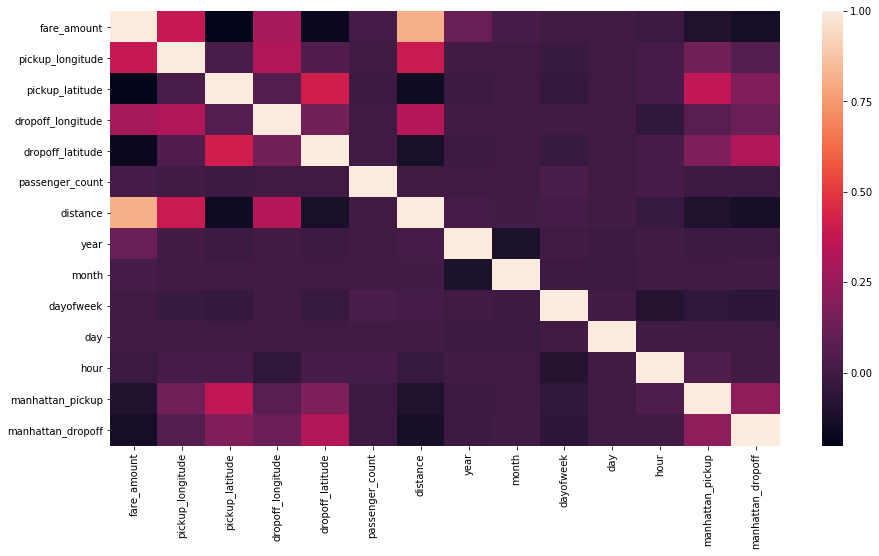

In [152]:
corr = train_dataframe.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr)
plt.savefig("heatmap.png")

The correlation heatmap of the problem features shows that none of the features are highly correlated.

In [153]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,dayofweek,day,hour,manhattan_pickup,manhattan_dropoff
fare_amount,1.00,0.39,-0.20,0.29,-0.17,0.01,0.81,0.12,0.03,0.00,0.00,-0.02,-0.10,-0.13
pickup_longitude,0.39,1.00,0.03,0.32,0.05,0.00,0.40,0.01,0.01,-0.02,0.00,0.02,0.14,0.06
pickup_latitude,-0.20,0.03,1.00,0.06,0.41,-0.01,-0.16,-0.02,-0.00,-0.04,-0.00,0.03,0.37,0.19
dropoff_longitude,0.29,0.32,0.06,1.00,0.15,-0.00,0.33,0.01,0.00,-0.00,0.00,-0.04,0.07,0.13
dropoff_latitude,-0.17,0.05,0.41,0.15,1.00,-0.00,-0.12,-0.01,-0.01,-0.03,-0.00,0.02,0.18,0.32
passenger_count,0.01,0.00,-0.01,-0.00,-0.00,1.00,0.01,0.00,0.00,0.04,0.01,0.02,-0.01,-0.01
distance,0.81,0.40,-0.16,0.33,-0.12,0.01,1.00,0.02,0.01,0.01,0.00,-0.03,-0.11,-0.13
year,0.12,0.01,-0.02,0.01,-0.01,0.00,0.02,1.00,-0.12,0.01,-0.01,0.00,-0.01,-0.01
month,0.03,0.01,-0.00,0.00,-0.01,0.00,0.01,-0.12,1.00,-0.01,-0.02,-0.01,-0.00,-0.00
dayofweek,0.00,-0.02,-0.04,-0.00,-0.03,0.04,0.01,0.01,-0.01,1.00,0.01,-0.09,-0.06,-0.06


## Naive Approach

In order to show the effectiveness of using machine learning techniques, a naive approach is considered. Considering that the problem is regression, this naive approach always returns the mean value of the target (fare_amount) in the training data. The correlation coefficient of naive approach is negative value.

In [154]:
# Create list of the same prediction for every observation
y_train_mean = np.mean(y_train)
print(y_train_mean)

y_train_pred_naive = [y_train_mean for _ in range(len(y_train))]
y_test_pred_naive = [y_train_mean for _ in range(len(y_test))]

11.329802657143876


In [155]:
print(np.corrcoef(y_train_pred_naive, y_train)[0,1])
print(np.corrcoef(y_test_pred_naive, y_test)[0,1])

-5.5961000304713335e-16
-9.27069756821954e-17


The correlation coefficient of machine learning technique will be compared to show the machine learning technique achieves better predictions.

# Machine Learning

In [156]:
# Create a list of the name of ML techniques that are going to be used in this project 
model_name = [ ]

# Create a list of r_squared of employed techniques for comparison
r_squared = []

# Create a list of MSE of employed techniques for comparison
mse = []

# Create a list of rmse of employed techniques for comparison
rmse = []

# Create a list of correlation coefficient of employed techniques for comparison
corrcoef = []

## Fitting Linear Regression using Statsmodels

In [157]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [158]:
# Creat an OLS object and fit a model t it.
model_all_features = ols('fare_amount ~ pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + passenger_count + distance + year + month + dayofweek + day + hour + manhattan_pickup + manhattan_dropoff', train_dataframe).fit()
print(model_all_features.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                 2.401e+05
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:36:07   Log-Likelihood:            -4.3277e+06
No. Observations:             1400000   AIC:                         8.655e+06
Df Residuals:                 1399986   BIC:                         8.656e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2588.2261     16.69

In [159]:
# correlation coefficient of y_test and predicted values
corr_ols = np.corrcoef(y_test, model_all_features.predict(X_test))[0,1]
print("Correlation coefficient of OLS is: {}".format(corr_ols))

Correlation coefficient of OLS is: 0.8356824545668223


Most of the coefficient are positive, represents a larger value of the variable corresponds to a larger fare_amount according to the model. Based on a linear model, for every 1 more passenger, the fare increases by $0.04. The intercept indicates the fare_amount that would be predicted if there is the coefficients of all the features are 0.

In [160]:
mse_total_all_features = model_all_features.mse_total
print("MSE of OLS is: {}".format(mse_total_all_features))
mse_total_all_features

MSE of OLS is: 91.5377947479092


91.5377947479092

In [161]:
rmse_resid_all_features = model_all_features.mse_resid
print("RMSE of OLS is: {}".format(rmse_resid_all_features))
rmse_resid_all_features

RMSE of OLS is: 28.346210937419844


28.346210937419844

In [162]:
print('R2: ', model_all_features.rsquared)

R2:  0.6903361305515454


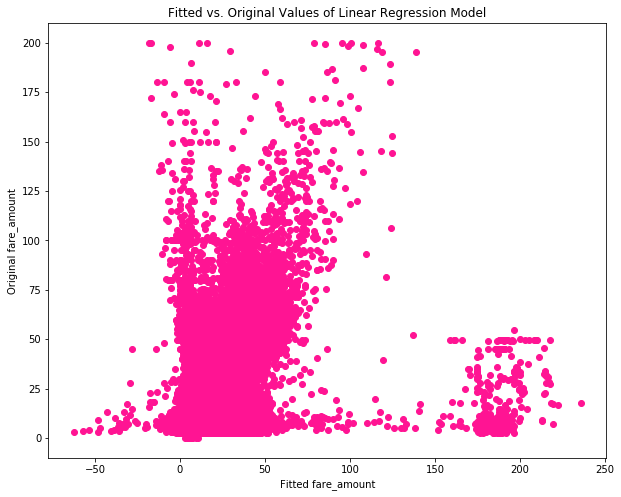

<Figure size 432x288 with 0 Axes>

In [163]:
# plot fitted values vs. original to see the correlation 
plt.figure(figsize=(10,8))
plt.scatter(model_all_features.fittedvalues, train_dataframe.fare_amount, c='deeppink')
plt.title("Fitted vs. Original Values of Linear Regression Model")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()
#plt.savefig("OLS.png")

In [164]:
# Add the name of the technique and its r_squared 

model_name.append(' Linear_Regression')
r_squared.append(model_all_features.rsquared)
mse.append(mse_total_all_features)
rmse.append(rmse_resid_all_features)
corrcoef.append(corr_ols)

## Random Forest Regression

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#help(RandomForestClassifier)

In [166]:
# Consider 10 trees for the random forest
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)

#fit model to data
rf_model.fit(X_train, y_train)

# Predict test set probabilities 
y_rf_pred = rf_model.predict(X_test)

accuracy_training_RF = rf_model.score(X_train, y_train)
accuracy_test_RF = rf_model.score(X_test, y_test)

print("Accuracy score of Random Forest Classifier on training data: {:2f}" .format(accuracy_training_RF))
print("Accuracy score of Random Forest Classifier on test data: {:2f}" .format(accuracy_test_RF))

Accuracy score of Random Forest Classifier on training data: 0.974780
Accuracy score of Random Forest Classifier on test data: 0.857678


In [167]:
corr_RF = np.corrcoef(y_test, y_rf_pred)[0,1]
print("correlation coefficient of Random Forest is: {}".format(corr_RF))

correlation coefficient of Random Forest is: 0.9262908388492077


In [168]:
mse_RF = mean_squared_error(y_test, y_rf_pred)
print("MSE of Random Forest is: {}".format(mse_RF))

MSE of Random Forest is: 13.070115902695003


In [169]:
r2_RF = r2_score(y_test, y_rf_pred)
print("R-Squared of Random Forest is: {}".format(r2_RF))

R-Squared of Random Forest is: 0.8576779339719651


In [170]:
rmse_RF = np.sqrt(mean_squared_error(y_test, y_rf_pred))
print("RMSE of Random Forest is: {}".format(rmse_RF))

RMSE of Random Forest is: 3.6152615261824423


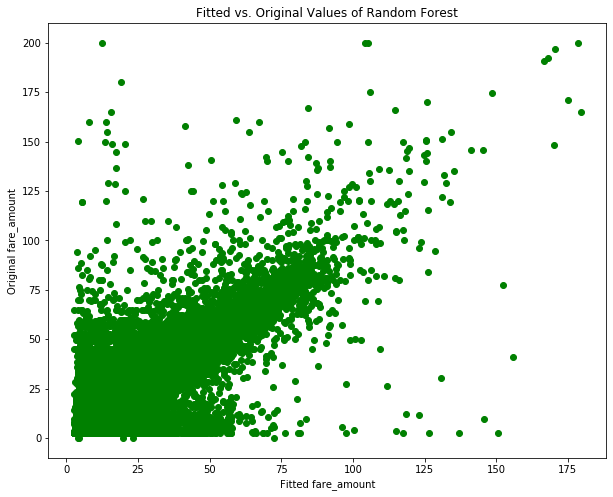

<Figure size 432x288 with 0 Axes>

In [173]:
# plot fitted values vs. original to see the correlation 
plt.figure(figsize=(10,8))
plt.scatter(y_rf_pred, y_test, c='green')
plt.title("Fitted vs. Original Values of Random Forest")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()
#plt.savefig("RandomForest.png")

In [174]:
# Add the name of the technique and its r_squared 

model_name.append('Random_Forest')
r_squared.append(r2_RF)
mse.append(mse_RF)
rmse.append(rmse_RF)
corrcoef.append(corr_RF)

## Decision Tree Regression

In [175]:
from sklearn.tree import DecisionTreeRegressor

In [176]:
dtr_model = DecisionTreeRegressor(random_state=0)

#fit model to data
dtr_model.fit(X_train, y_train)

# Predict test set probabilities 
y_dtr_pred = dtr_model.predict(X_test)
y_dtr_pred

accuracy_training_dtr = dtr_model.score(X_train, y_train)
accuracy_test_dtr = dtr_model.score(X_test, y_test)

print("Accuracy score of Decision Tree Regression on training data: {:2f}" .format(accuracy_training_dtr))
print("Accuracy score of Decision Tree Regression on test data: {:2f}" .format(accuracy_test_dtr))

Accuracy score of Decision Tree Regression on training data: 1.000000
Accuracy score of Decision Tree Regression on test data: 0.741818


In [177]:
corr_dtr = np.corrcoef(y_test, y_dtr_pred)[0,1]
print("Correlation coefficient of Decision Tree is: {}".format(corr_RF))

Correlation coefficient of Decision Tree is: 0.9262908388492077


In [178]:
mse_dtr= mean_squared_error(y_test, y_dtr_pred)
print("MSE of Decision Tree is: {}".format(mse_dtr))

MSE of Decision Tree is: 23.710124153499994


In [179]:
r2_dtr = r2_score(y_test, y_dtr_pred)
print("Squared of Decision Tree is: {}".format(r2_dtr))

Squared of Decision Tree is: 0.7418176028101229


In [180]:
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_dtr_pred))
print("RMSE of Decision Tree is: {}".format(rmse_dtr))

RMSE of Decision Tree is: 4.869304278179789


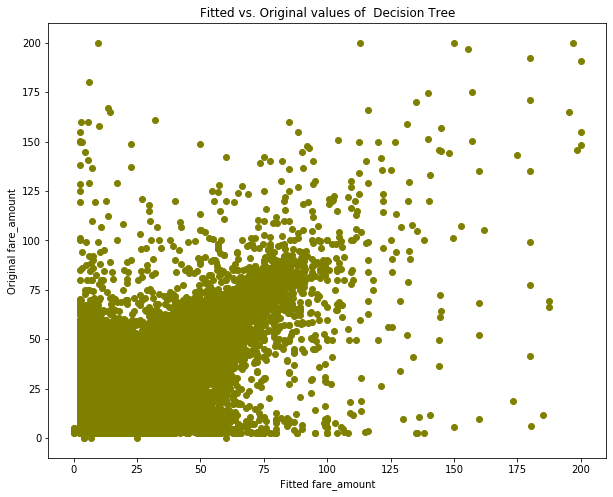

<Figure size 432x288 with 0 Axes>

In [183]:
# plot fitted values vs. original to see the correlation 
plt.figure(figsize=(10,8))
plt.scatter(y_dtr_pred, y_test, c='olive')
plt.title("Fitted vs. Original values of  Decision Tree")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()
#plt.savefig("DecisionTree.png")

In [184]:
# Add the name of the technique and its r_squared 

model_name.append('Decision_Tree')
r_squared.append(r2_dtr)
mse.append(mse_dtr)
rmse.append(rmse_dtr)
corrcoef.append(corr_dtr)

## Gradient Boosting Regressor

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

In [186]:
gbr_model = GradientBoostingRegressor(random_state=0)

#fit model to data
gbr_model.fit(X_train, y_train)

# Predict test set probabilities 
y_gbr_pred = gbr_model.predict(X_test)
y_gbr_pred

accuracy_training_gbr = gbr_model.score(X_train, y_train)
accuracy_test_gbr = gbr_model.score(X_test, y_test)

print("Accuracy score of Gradient Boosting Regressor on training data: {:2f}" .format(accuracy_training_gbr))
print("Accuracy score of Gradient Boosting Regressor on test data: {:2f}" .format(accuracy_test_gbr))

Accuracy score of Gradient Boosting Regressor on training data: 0.852536
Accuracy score of Gradient Boosting Regressor on test data: 0.848122


In [187]:
corr_gbr = np.corrcoef(y_test, y_gbr_pred)[0,1]
print("Correlation coefficient of Decision Tree is: {}".format(corr_RF))

Correlation coefficient of Decision Tree is: 0.9262908388492077


In [188]:
mse_gbr= mean_squared_error(y_test, y_gbr_pred)
print("MSE of Decision Tree is: {}".format(mse_gbr))

MSE of Decision Tree is: 13.947722888516907


In [189]:
r2_gbr = r2_score(y_test, y_gbr_pred)
print("Squared of Decision Tree is: {}".format(r2_gbr))

Squared of Decision Tree is: 0.8481215658178728


In [190]:
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_gbr_pred))
print("RMSE of Decision Tree is: {}".format(rmse_gbr))

RMSE of Decision Tree is: 3.7346650302961453


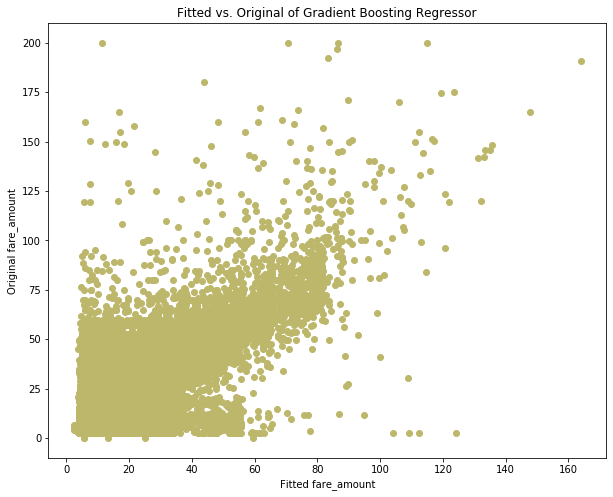

<Figure size 432x288 with 0 Axes>

In [193]:
# plot fitted values vs. original to see the correlation 
plt.figure(figsize=(10,8))
plt.scatter(y_gbr_pred, y_test, c='darkkhaki')
plt.title("Fitted vs. Original of Gradient Boosting Regressor")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()
#plt.savefig("GradientBoosting.png")

In [194]:
# Add the name of the technique and its r_squared 

model_name.append('Gradient_Boosting')
r_squared.append(r2_gbr)
mse.append(mse_gbr)
rmse.append(rmse_gbr)
corrcoef.append(corr_gbr)

## Linear Support Vector Regression

In [195]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [196]:
# Build the pipeline
lsvr_model = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))

#fit model to data
lsvr_model.fit(X_train, y_train)

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvr',
                 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=0, tol=1e-05,
                           verbose=0))],
         verbose=False)

In [197]:
# Extract the component vectors
vectors = lsvr_model.steps[1][1]
vectors

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

In [198]:
# Predict test set probabilities 
y_lsvr_pred = lsvr_model.predict(X_test)
y_lsvr_pred

accuracy_train_lsvr = lsvr_model.score(X_train, y_train)
accuracy_test_lsvr = lsvr_model.score(X_test, y_test)

print("Accuracy score of Support Vector Regression on training data: {:2f}" .format(accuracy_train_lsvr))
print("Accuracy score of Support Vector Regression on test data: {:2f}" .format(accuracy_test_lsvr))

Accuracy score of Support Vector Regression on training data: 0.665326
Accuracy score of Support Vector Regression on test data: 0.676385


In [199]:
corr_lsvr = np.corrcoef(y_test, y_lsvr_pred)[0,1]
print("Correlation coefficient of Support Vector Regression is: {}".format(corr_lsvr))

Correlation coefficient of Support Vector Regression is: 0.8295881292053233


In [200]:
mse_lsvr= mean_squared_error(y_test, y_lsvr_pred)
print("MSE of Support Vector Regression is: {}".format(mse_lsvr))

MSE of Support Vector Regression is: 29.719103702005395


In [201]:
r2_lsvr = r2_score(y_test, y_lsvr_pred)
print("Squared of Support Vector Regression is: {}".format(r2_lsvr))

Squared of Support Vector Regression is: 0.6763851008774386


In [202]:
rmse_lsvr = np.sqrt(mean_squared_error(y_test, y_lsvr_pred))
print("RMSE of Support Vector Regression is: {}".format(rmse_lsvr))

RMSE of Support Vector Regression is: 5.451523062595021


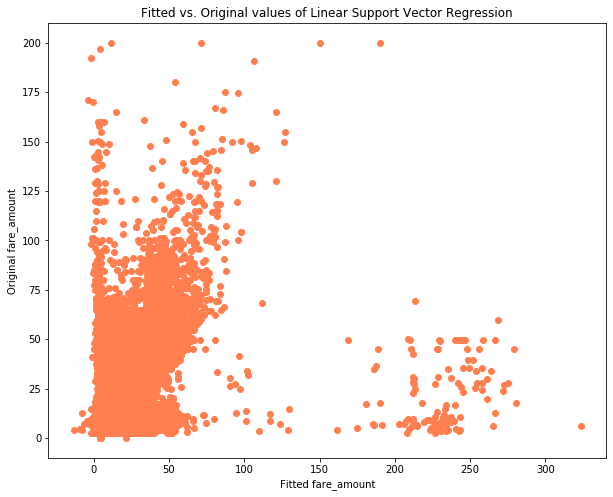

<Figure size 432x288 with 0 Axes>

In [205]:
# plot fitted values vs. original to see the correlation 
plt.figure(figsize=(10,8))
plt.scatter(y_lsvr_pred, y_test, c='coral')
plt.title("Fitted vs. Original values of Linear Support Vector Regression")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()
#plt.savefig("LinearSVR.png")

In [206]:
# Add the name of the technique and its r_squared 

model_name.append('Linear_Support_Vector_Regression')
r_squared.append(r2_lsvr)
mse.append(mse_lsvr)
rmse.append(rmse_lsvr)
corrcoef.append(corr_lsvr)

## Evalution

In order to validate the performance of employed machine learning algorithms, some metrics have been considered that are shown in below:

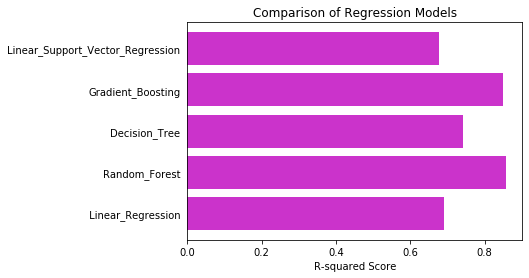

In [275]:
fig, ax = plt.subplots()

ind = range(len(model_name))
ax.barh(ind, r_squared, align='center', color = 'm', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(model_name)
ax.set_xlabel('R-squared Score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('r2.png')

The larger R-squared means the regression model fits the observations better. Both Random Forest and Gradient Boosting obtain high R-squared value. 


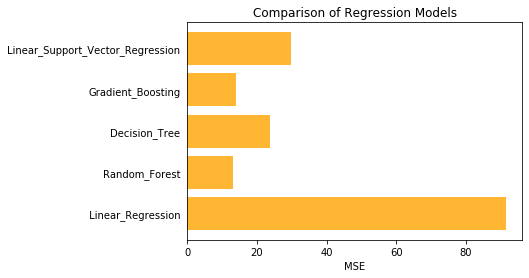

In [285]:
fig, ax = plt.subplots()

ind = range(len(model_name))
ax.barh(ind, mse, align='center', color = 'orange', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(model_name)
ax.set_xlabel('MSE')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('MSE.png')

Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
As shown in this plot, both Random Forest and Gradient Boosting have lower MSE compared to other models.

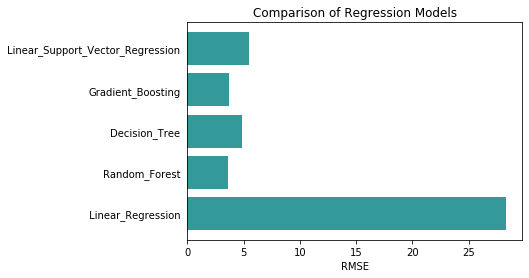

In [277]:
fig, ax = plt.subplots()

ind = range(len(model_name))
ax.barh(ind, rmse, align='center', color = 'teal', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(model_name)
ax.set_xlabel('RMSE')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('RMSE.png')

Root mean square error (RMSE) is a method of measuring the difference between values predicted by a model and their actual values. In other words, RMSE represents how concentrated the data is around the regression line of the best fitted model. The non-negative values that are close to zero are better.
Both Random Forest and Gradient Boosting obtain low values. 

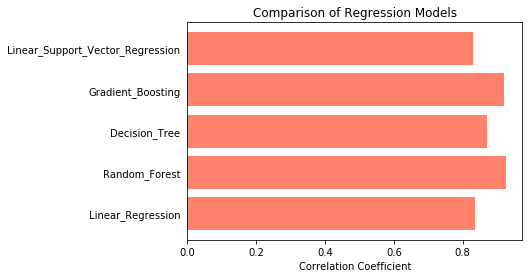

In [278]:
fig, ax = plt.subplots()

ind = range(len(model_name))
ax.barh(ind, corrcoef, align='center', color = 'tomato', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(model_name)
ax.set_xlabel('Correlation Coefficient')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('CoreCoef.png')

The correlation coefficient returns a value between -1 (full negative correlation) and 1 (full positive correlation) that indicates the strength of linear relationship among two variables.es.
Both Random Forest and Gradient Boosting indicate a notable correlation between target value and predicted values.

The evaluation indicates that the non-linear algorithm such as the Random Forest model increases the performance. Based on the above evaluation both Random Forest and Gradient Boosting have pretty close results. Therefore, Random Forest is going to be used for the rest of the project parts. 

## A Deeper Look at the Accuracy of the Model

In [216]:
#np.count_nonzero(np.isnan(y_rf_pred))
#np.count_nonzero(np.isnan(y_predicted_rf))

In [217]:
y_predicted_rf = pd.Series(y_rf_pred)
df_RF = pd.concat([y_test.reset_index(drop=True), y_predicted_rf.reset_index(drop=True)], axis=1)
df_RF.columns = ['Actual_Fare_amount', 'Predicted_Fare_amount']

To see the error between actual fare_amount and predicted fare_amount, the Predicted_Fare_amount over the Actual_Fare_amount ratio is calculated. The ration value close to one shows that the prediction model is more accurate. 

In [218]:
df_RF['Ratio'] = df_RF['Predicted_Fare_amount'] / df_RF['Actual_Fare_amount']
df_RF['Residual'] = df_RF['Actual_Fare_amount'] - df_RF['Predicted_Fare_amount']

df_RF

,Actual_Fare_amount,Predicted_Fare_amount,Ratio,Residual
0,9.00,9.50,1.06,-0.50
1,10.10,10.38,1.03,-0.28
2,6.00,5.90,0.98,0.10
3,6.50,6.52,1.00,-0.02
4,6.90,7.20,1.04,-0.30
...,...,...,...,...
599995,8.00,12.30,1.54,-4.30
599996,5.00,6.45,1.29,-1.45
599997,6.50,5.90,0.91,0.60
599998,4.50,4.90,1.09,-0.40


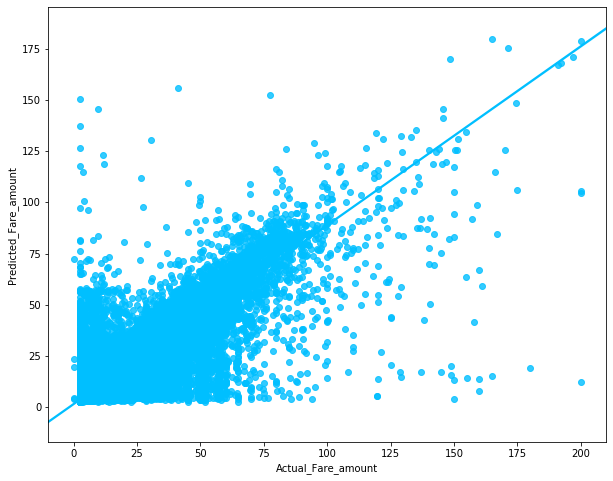

In [279]:
plt.figure(figsize=(10, 8))
sns.regplot(x=df_RF['Actual_Fare_amount'], y=df_RF['Predicted_Fare_amount'], data=df_RF, color='deepskyblue', ci=95)
fig.savefig('Ratio.png')

The relationship between Actual_fare_amount and Predicted_Fare_amount has been plotted a linear regression model fit. 

In [220]:
# Set a athreshold for ration
# threshold 0.1
threshold = [0.90, 1.10]

In [221]:
threshold_10 = df_RF[(df_RF['Ratio'] >= threshold[0]) & (df_RF['Ratio'] <= threshold[1])]
threshold_10

,Actual_Fare_amount,Predicted_Fare_amount,Ratio,Residual
0,9.00,9.50,1.06,-0.50
1,10.10,10.38,1.03,-0.28
2,6.00,5.90,0.98,0.10
3,6.50,6.52,1.00,-0.02
4,6.90,7.20,1.04,-0.30
...,...,...,...,...
599989,14.50,14.00,0.97,0.50
599993,38.83,37.05,0.95,1.78
599994,4.90,4.82,0.98,0.08
599997,6.50,5.90,0.91,0.60


In order to limit the visualization to more accurate prediction, the data with error lower than 10%  is plotted below where we can see a more linear curve. 

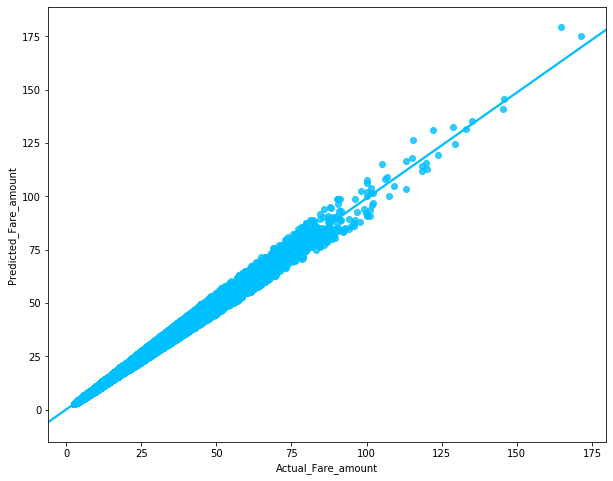

In [280]:
plt.figure(figsize=(10, 8))
sns.regplot(x=threshold_10['Actual_Fare_amount'], y=threshold_10['Predicted_Fare_amount'], data=threshold_10, color='deepskyblue', ci=95)
fig.savefig('ratio_thre.png')

Calculated ratio shows 45% of the data has a good error (less than 10%)
 

# Classification

Classification is a type of supervised learning where the data is already labeled. In this project Naive Bayes Classifier is used which is a fast algorithm compared to other classification algorithms. 

## Naive Bayes Classifier

New York city taxi fare prediction is a regression problem. In order to consider machine learning classification techniques, the problem is changed to classification problem. 

In [223]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

The continuous target is changed to labeled target by considering 3 different fare_amount ranges. 

In [224]:
# Create labeld y_train for classification
y_train_new = y_train.copy() 
y_test_new = y_test.copy()

def create_labels(target):
    for items in target.iteritems(): 
        if items[1] <= 15:
            target[items[0]] = 'cheap' 
        elif 15 < items[1] <= 50:
             target[items[0]] = 'average' 
        elif items[1] > 50:
             target[items[0]] = 'expensive'
    return target

In [225]:
y_train_labeled = create_labels(y_train_new)
y_test_labeled = create_labels(y_test_new)

In [226]:
# Transform features by scaling each feature to a given range.
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)


#normalized_X_train = preprocessing.normalize(X_train)
#normalized_X_test = preprocessing.normalize(X_test)

model_NB = MultinomialNB()
model_NB.fit(X_train_minmax, y_train_labeled)

# Predict test set probabilities 
y_NB_pred = model_NB.predict(X_test_minmax)

accuracy_score_train_NB = model_NB.score(X_train_minmax, y_train_labeled)
accuracy_score_test_NB = model_NB.score(X_test_minmax, y_test_labeled)

print("accuracy_score_train is \n{}".format(accuracy_score_train_NB))
print("accuracy_score_test is \n{}".format(accuracy_score_test_NB))

accuracy_score_train is 
0.8239464285714285
accuracy_score_test is 
0.8225866666666667


In [227]:
# Create a dataframe from y_test_new and predicted value
new_df = pd.DataFrame({'y_test_new': y_test_new, 'y_NB_pred': y_NB_pred})
y_NB_pred

array(['cheap', 'cheap', 'cheap', ..., 'cheap', 'cheap', 'cheap'],
      dtype='<U9')

In [228]:
# Check the percentage of correct prediction 
true_predicted = new_df[new_df['y_test_new'] == new_df['y_NB_pred']].count()
true_predicted/len(new_df)

y_test_new   0.82
y_NB_pred    0.82
dtype: float64

In [229]:
type(new_df['y_test_new'] == new_df['y_NB_pred'])

pandas.core.series.Series

In [230]:
new_df['prediction_result'] = (new_df['y_test_new'] == new_df['y_NB_pred'])
new_df.head()

,y_test_new,y_NB_pred,prediction_result
1894303,cheap,cheap,True
1243302,cheap,cheap,True
201900,cheap,cheap,True
1687669,cheap,cheap,True
198041,cheap,cheap,True


In [283]:
price_label = ['cheap', 'average', 'expensive']


true_cheap = (new_df[(new_df['prediction_result'] == True) & (new_df['y_test_new'] == 'cheap')].count())[2]

true_averae = (new_df[(new_df['prediction_result'] == True) & (new_df['y_test_new'] == 'average')].count())[2]

true_expensive = (new_df[(new_df['prediction_result'] == True) & (new_df['y_test_new'] == 'expensive')].count())[2]


false_cheap = (new_df[(new_df['prediction_result'] == False) & (new_df['y_test_new'] == 'cheap')].count())[2]

false_averae = (new_df[(new_df['prediction_result'] == False) & (new_df['y_test_new'] == 'average')].count())[2]

false_expensive = (new_df[(new_df['prediction_result'] == False) & (new_df['y_test_new'] == 'expensive')].count())[2]


true = np.array([true_cheap, true_averae, true_expensive])
false = np.array([false_cheap, false_averae, false_expensive])

ind = [x for x, _ in enumerate(price_label)]

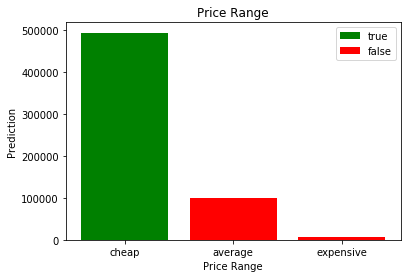

In [284]:
plt.bar(ind, true, width=0.8, label='true', color='green', bottom=false)
plt.bar(ind, false, width=0.8, label='false', color='red')

#plt.figure(figsize=(10,8))
plt.xticks(ind, price_label)
plt.ylabel("Prediction")
plt.xlabel("Price Range")
plt.legend(loc="upper right")
plt.title("Price Range")
plt.show()

# Additional Explorations

## Feature Selection

In order to see the effect of feature selection on the performance of prediction models, the OLS is used considering features that have the strongest relationship with the target variable. 

In [233]:
model_selected_features = ols('fare_amount ~ pickup_longitude + dropoff_longitude + passenger_count + distance + year + month + day + hour', train_dataframe).fit()
print(model_selected_features.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 3.728e+05
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:01:56   Log-Likelihood:            -4.3494e+06
No. Observations:             1400000   AIC:                         8.699e+06
Df Residuals:                 1399991   BIC:                         8.699e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           494.7885     13.43

In [234]:
mse_resid_selected_features = model_selected_features.mse_resid
mse_resid_selected_features

29.242355913920953

In [235]:
mse_total_selected_features = model_selected_features.mse_total
mse_total_selected_features

91.5377947479092

In [236]:
np.corrcoef(y_test, model_selected_features.predict(X_test))[0,1]

0.8306100599282907

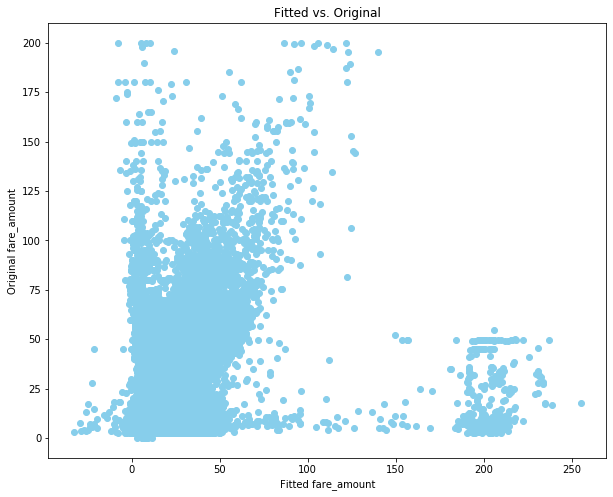

In [237]:
plt.figure(figsize=(10,8))
plt.scatter(model_selected_features.fittedvalues, train_dataframe.fare_amount, c='skyblue')
plt.title("Fitted vs. Original")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()

Reduce number of features.

In [238]:
model_features = ols('fare_amount ~ pickup_longitude + dropoff_longitude + distance + passenger_count + year', train_dataframe).fit()
print(model_features.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 5.943e+05
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:02:11   Log-Likelihood:            -4.3512e+06
No. Observations:             1400000   AIC:                         8.702e+06
Df Residuals:                 1399994   BIC:                         8.703e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           532.2306     13.43

In [288]:
rmse_resid_features = model_features.mse_resid
rmse_resid_features

29.3166650204878

In [240]:
mse_total_features = model_features.mse_total
mse_total_features

91.5377947479092

In [241]:
np.corrcoef(y_test, model_features.predict(X_test))[0,1]

0.8301167714159965

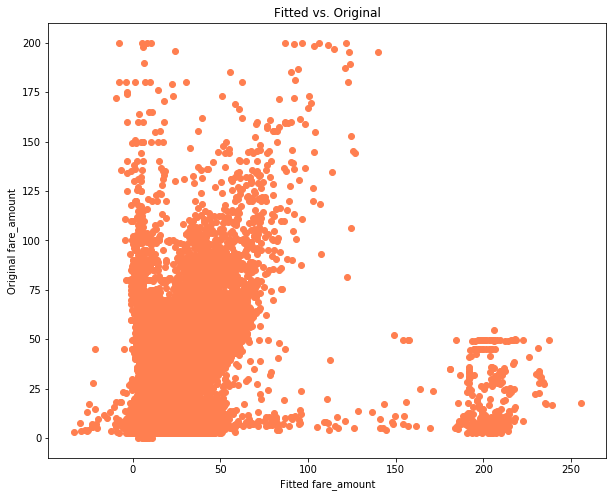

In [242]:
plt.figure(figsize=(10,8))
plt.scatter(model_features.fittedvalues, train_dataframe.fare_amount, c='coral')
plt.title("Fitted vs. Original")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()

In [243]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below

model_three_features = ols('fare_amount ~ distance + passenger_count + year', train_dataframe).fit()
print(model_three_features.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 9.680e+05
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:02:24   Log-Likelihood:            -4.3621e+06
No. Observations:             1400000   AIC:                         8.724e+06
Df Residuals:                 1399996   BIC:                         8.724e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1091.3559      4.970   -2

In [287]:
rmse_resid_three_features= model_three_features.mse_resid
rmse_resid_three_features

29.775417824312623

In [245]:
mse_total_three_features = model_three_features.mse_total
mse_total_three_features

91.5377947479092

In [246]:
np.corrcoef(y_test, model_three_features.predict(X_test))[0,1]

0.8275211416627608

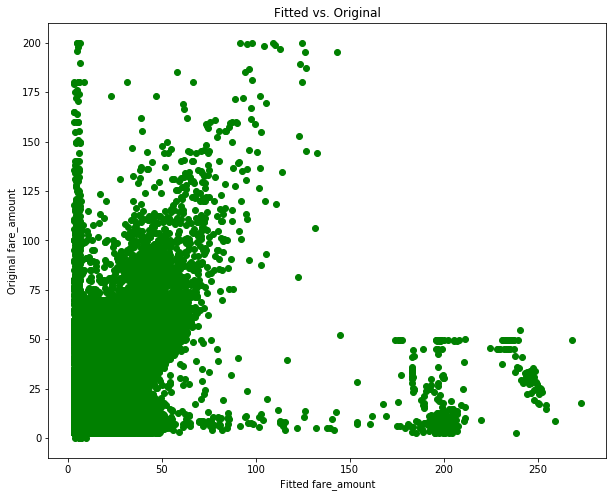

In [247]:
plt.figure(figsize=(10,8))
plt.scatter(model_three_features.fittedvalues, train_dataframe.fare_amount, c='green')
plt.title("Fitted vs. Original")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()

Based on the Heatmap (corrrelate coefficient) and coeeficient of distance in summary table, it seems that distance has a signifact affect on the model. Therefore, lets try only distance as a selected feature.

In [248]:
model_single_feature = ols('fare_amount ~ distance',train_dataframe).fit()
print(model_single_feature.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                 2.759e+06
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:02:37   Log-Likelihood:            -4.3861e+06
No. Observations:             1400000   AIC:                         8.772e+06
Df Residuals:                 1399998   BIC:                         8.772e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5714      0.006    736.124      0.0

In [286]:
rmse_resid_single_feature = model_single_feature.mse_resid
rmse_resid_single_feature

30.813491725119352

In [250]:
mse_total_single_feature = model_single_feature.mse_total
mse_total_single_feature

91.5377947479092

In [251]:
np.corrcoef(y_test, model_single_feature.predict(X_test))[0,1]

0.8207876066812633

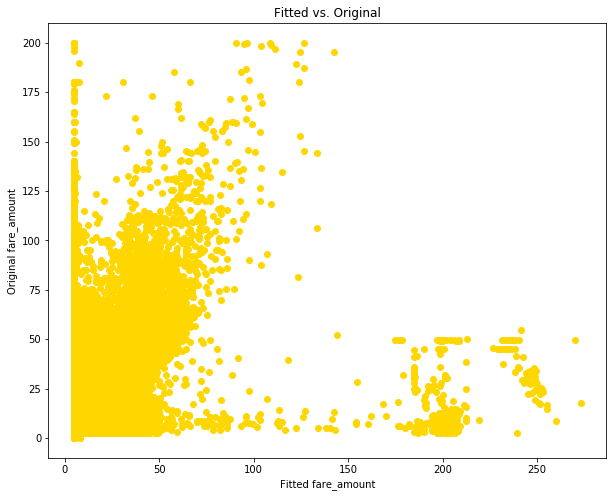

In [252]:
plt.figure(figsize=(10,8))
plt.scatter(model_single_feature.fittedvalues, train_dataframe.fare_amount, c='gold')
plt.title("Fitted vs. Original")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()

The coefficient of distance is 2.0 with the small p-value (under p>|t|). This means that distance is a statisticall significant predictor of fare_amount.
The confidence interval gives us a range of plausible values for this average change, about ( 2.002, 2.007 ), definitely not chump change.

The OLS models using different combination of features are represented above. However, the results do not show a significant improvement. The reason can be because the number of original features is already not large.

## Principal Component Analysis (PCA)

Using PCA to reduce the dimensionality of the features from 13 to 3.

In [253]:
from sklearn.decomposition import PCA

In [255]:
# Using PCA for dimensionality-reduction
pca = PCA(n_components=3)
pca.fit(X_train)
features = range(pca.n_components_)

# Apply PCA to the dataset X_train
transformed = pca.transform(X_train)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[0.4888731  0.27566378 0.09803552]


In [256]:
target = y_train.reset_index(drop = True)

In [257]:
type(transformed)
transformed_dataframe = pd.DataFrame(data=transformed)
transformed_dataframe.columns = ['PC1','PC2','PC3']
transformed_dataframe['fare_amount'] = target
transformed_dataframe.head()

,PC1,PC2,PC3,fare_amount
0,-12.72,4.40,-2.46,4.50
1,0.31,-3.53,-2.28,4.00
2,-2.65,-1.50,-2.62,8.50
3,-13.68,-6.44,0.98,7.70
4,-9.71,6.41,-2.71,4.50


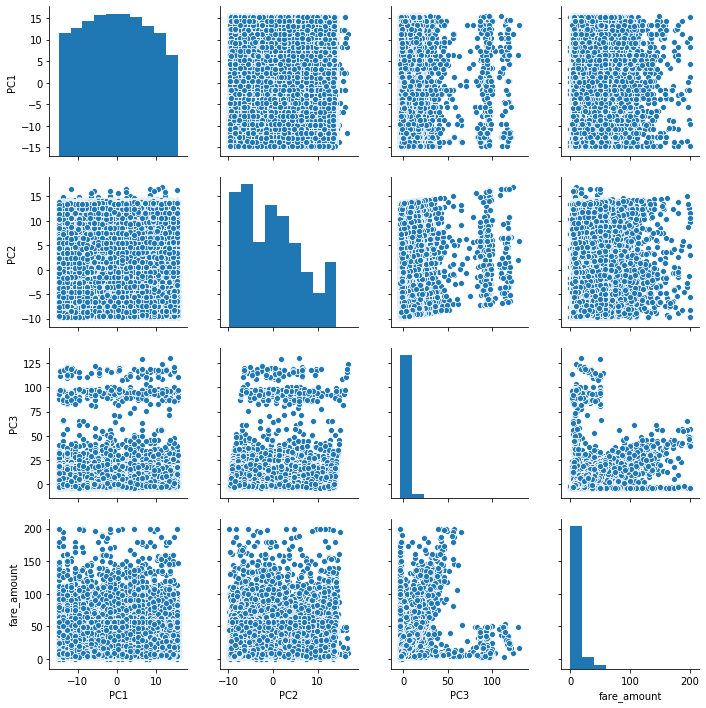

In [258]:
# Create a pairplot of the principal component dataframe
sns.pairplot(transformed_dataframe)
plt.show()

In [259]:
print(pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC1','PC2','PC3']))
#pca.components_.shape

     pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
PC1              0.00            -0.00               0.00             -0.00   
PC2             -0.00            -0.00               0.00             -0.00   
PC3              0.00            -0.00               0.00             -0.00   

     passenger_count  distance  year  month  dayofweek   day  hour  \
PC1             0.00      0.00 -0.00  -0.01       0.00  1.00  0.01   
PC2            -0.00      0.03 -0.00   0.00       0.03  0.01 -1.00   
PC3             0.00      1.00  0.01   0.04       0.01 -0.00  0.03   

     manhattan_pickup  manhattan_dropoff  
PC1             -0.00              -0.00  
PC2             -0.00              -0.00  
PC3             -0.01              -0.02  


In [260]:
pca_dataframe = pd.DataFrame(data=pca.components_, index=['PC1','PC2','PC3'])
pca_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
PC1,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.01,0.00,1.00,0.01,-0.00,-0.00
PC2,-0.00,-0.00,0.00,-0.00,-0.00,0.03,-0.00,0.00,0.03,0.01,-1.00,-0.00,-0.00
PC3,0.00,-0.00,0.00,-0.00,0.00,1.00,0.01,0.04,0.01,-0.00,0.03,-0.01,-0.02


In [261]:
pca_ols_model =  ols('fare_amount ~ PC1 + PC2 + PC3', transformed_dataframe).fit()
print(pca_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 9.227e+05
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:05:24   Log-Likelihood:            -4.3846e+06
No. Observations:             1400000   AIC:                         8.769e+06
Df Residuals:                 1399996   BIC:                         8.769e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3298      0.005   2417.596      0.0

In [262]:
pred_value = pca_ols_model.predict(transformed_dataframe)


In [263]:
#df_pca = pd.DataFrame({'customer_name':df_offer_customer.index.values,'x':xs, 'y':ys, 'fare_amount':labels})
#df_pca.head()

In [264]:
transformed_dataframe['predicted_fare_amount'] = pred_value
transformed_dataframe.head()

,PC1,PC2,PC3,fare_amount,predicted_fare_amount
0,-12.72,4.40,-2.46,4.50,6.60
1,0.31,-3.53,-2.28,4.00,6.60
2,-2.65,-1.50,-2.62,8.50,6.02
3,-13.68,-6.44,0.98,7.70,13.00
4,-9.71,6.41,-2.71,4.50,6.17


In [265]:
mse_resid = pca_ols_model.mse_resid
mse_resid

30.747176403860962

In [266]:
mse_total = pca_ols_model.mse_total
mse_total

91.5377947479092

In [267]:
np.corrcoef(transformed_dataframe['fare_amount'], transformed_dataframe['predicted_fare_amount'])[0,1]

0.8149262232141958

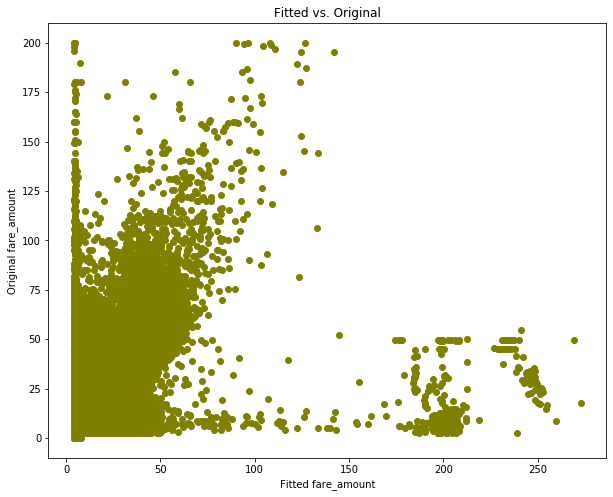

In [268]:
plt.figure(figsize=(10,8))
plt.scatter(pca_ols_model.fittedvalues, train_dataframe.fare_amount, c='olive')
plt.title("Fitted vs. Original")
plt.xlabel("Fitted fare_amount")
plt.ylabel("Original fare_amount")
plt.show()

Although usually the PCA increases the performance of the model, the results show that it does not have significant influence on the model. 